In [1]:
import os

from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization


In [2]:
(trainX, trainY), (testX, testY) = mnist.load_data()

In [3]:
trainX.shape

(60000, 28, 28)

In [4]:
(trainX, trainY), (testX, testY) = mnist.load_data()
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [5]:
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm_X = train_norm / 255.0
test_norm_X = test_norm / 255.0

In [6]:
train_norm.shape

(60000, 28, 28, 1)

In [7]:
def cnn_deep_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [8]:
def cnn_BN_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
def cnn_DPL_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
def mix_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    #output a softmax to squash the matrix into output probabilities
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
models = list()
models.append(cnn_deep_model())
models.append(cnn_BN_model())
models.append(cnn_DPL_model())
models.append(mix_cnn_model())

2022-08-26 20:51:15.406820: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model_logs = list()
index = 1;
for model in models:
    batch_size = 128
    num_epoch = 10
    #model training
    model_logs.append(model.fit(train_norm_X, trainY,
              batch_size=batch_size,
              epochs=num_epoch,
              verbose=1,
              validation_data=(test_norm_X, testY)))
    score = model.evaluate(test_norm_X, testY, verbose=0)
    print('Test loss of Model# {} : ' .format(index), score[0]) 
    print('Test accuracy of Model# {} :'.format(index), score[1]) 
    index+=1

Epoch 1/10
469/469 [==============================] - 26s 55ms/step - loss: 9.7298e-05 - accuracy: 1.0000 - val_loss: 0.0299 - val_accuracy: 0.9929
Epoch 2/10
469/469 [==============================] - 26s 55ms/step - loss: 8.8324e-05 - accuracy: 1.0000 - val_loss: 0.0303 - val_accuracy: 0.9929
Epoch 3/10
469/469 [==============================] - 26s 55ms/step - loss: 8.1607e-05 - accuracy: 1.0000 - val_loss: 0.0305 - val_accuracy: 0.9928
Epoch 4/10
469/469 [==============================] - 25s 54ms/step - loss: 7.6719e-05 - accuracy: 1.0000 - val_loss: 0.0306 - val_accuracy: 0.9930
Epoch 5/10
469/469 [==============================] - 25s 53ms/step - loss: 7.2002e-05 - accuracy: 1.0000 - val_loss: 0.0310 - val_accuracy: 0.9928
Epoch 6/10
469/469 [==============================] - 25s 54ms/step - loss: 6.7895e-05 - accuracy: 1.0000 - val_loss: 0.0311 - val_accuracy: 0.9928
Epoch 7/10
469/469 [==============================] - 26s 54ms/step - loss: 6.4937e-05 - accuracy: 1.0000 - val_

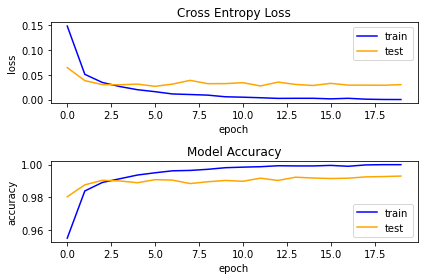

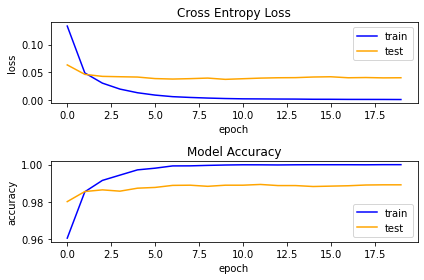

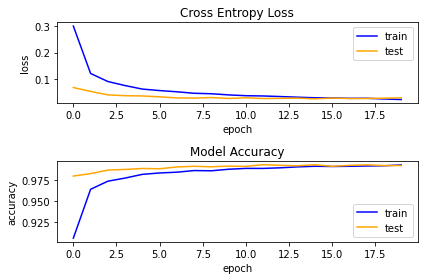

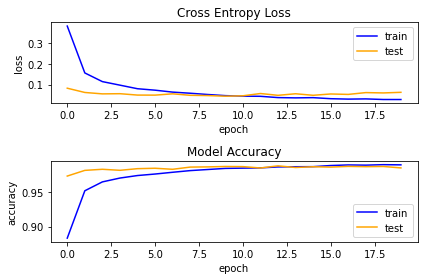

In [13]:
for model_log in model_logs:
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(model_log.history['loss'], color='blue', label='train')
    plt.plot(model_log.history['val_loss'], color='orange', label='test')
    plt.title('Cross Entropy Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    # plot accuracy
    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(model_log.history['accuracy'], color='blue', label='train')
    plt.plot(model_log.history['val_accuracy'], color='orange', label='test')
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')
    plt.tight_layout()
    plt.show()

I have various variations of models. First one is proving highest accuracy and lowest loss as compared to other ones where I have used more deeper network. In second model I have applied batch normalization which result in signinnficant improvment in terms of time complexity, however accuracy is less than the first deeper network. In third network I have added some dropout layers also and this model resulting significant reduction of validation loss. Last model is mix of above three and result are quit similar to second model.